In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
#import category_encoders as ce

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
data = pd.read_csv(path+'train.csv', header=0)
data.shape

(47803, 37)

In [5]:
data.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [6]:
data.isnull().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

In [0]:
data.drop('outcome_datetime', axis=1, inplace=True)

In [8]:
data[data.sex_upon_intake.isnull()]

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
6523,A667395,2006,11,7 years,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,1,2555,7.0,"(5.0, 7.5]",2013-11-17 13:15:00,11,2013,2013-11,Sunday,13,1.0,10 days 02:56:00.000000000,10.122222,7 years,2006-11-17 00:00:00,NaN,2555,7.0,"(5.0, 7.5]",11,2013,2013-11,Wednesday,16,1.0,Return to Owner


In [0]:
data.fillna('Unknown', inplace = True)

In [10]:
data.isnull().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_month                 0
outcome_year                  0
outcome_

In [0]:
data.drop('animal_id_outcome', axis=1, inplace=True)

In [0]:
targets = data.outcome_type.unique()

In [13]:
for c in data.columns:
    print(c, data[c].unique(), "\n")

dob_year [2007 2004 1997 1998 1999 2000 1994 2001 2002 2003 2006 2009 2005 2011
 1995 2008 2013 2010 1996 2016 2014 2012 2015 1992 1993] 

dob_month [ 7  4 10  6  8  3  1  5 11 12  2  9] 

age_upon_intake ['10 years' '7 years' '6 years' '16 years' '15 years' '18 years'
 '14 years' '17 years' '13 years' '19 years' '12 years' '20 years'
 '11 years' '9 years' '5 years' '8 years' '3 years' '4 years' '1 year'
 '11 months' '9 months' '2 years' '8 months' '10 months' '7 months'
 '5 months' '6 months' '3 months' '4 months' '2 months' '1 week' '3 weeks'
 '1 weeks' '0 years' '4 weeks' '1 month' '2 weeks' '3 days' '4 days'
 '2 days' '1 day' '5 weeks' '5 days' '6 days' '22 years'] 

animal_type ['Dog' 'Cat' 'Other' 'Bird'] 

breed ['Spinone Italiano Mix' 'Dachshund' 'Shetland Sheepdog' ...
 'Dachshund/Pomeranian' 'Rhod Ridgeback/Chow Chow' 'Mastiff/Bloodhound'] 

color ['Yellow/White' 'Tricolor' 'Brown/White' 'Black/White' 'Black/Gray'
 'White/Black' 'Brown Tabby/White' 'Black/Tan' 'Tan/Black' 'Bl

In [0]:
data.drop(['age_upon_intake', 'count', 'age_upon_intake_(years)',
           'intake_datetime', 'intake_monthyear', 'time_in_shelter',
           'age_upon_outcome', 'date_of_birth', 'age_upon_outcome_(years)',
           'outcome_monthyear'], axis=1, inplace=True)

In [15]:
categoryColumns = []
numericalColumns = []
for col in data.columns:
    if data[col].dtype == 'object':
        categoryColumns.append(col)
    else:
        numericalColumns.append(col)
print('Category Columns: ',categoryColumns, '\n')
print('Numerical Columns: ',numericalColumns)

Category Columns:  ['animal_type', 'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_age_group', 'intake_weekday', 'sex_upon_outcome', 'age_upon_outcome_age_group', 'outcome_weekday', 'outcome_type'] 

Numerical Columns:  ['dob_year', 'dob_month', 'age_upon_intake_(days)', 'intake_month', 'intake_year', 'intake_hour', 'intake_number', 'time_in_shelter_days', 'age_upon_outcome_(days)', 'outcome_month', 'outcome_year', 'outcome_hour', 'outcome_number']


In [16]:
data.describe(include = 'all')

,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_age_group,intake_month,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,outcome_number,outcome_type
count,47803.000000,47803.000000,47803,47803,47803,47803,47803,47803,47803.000000,47803,47803.000000,47803.000000,47803,47803.000000,47803.000000,47803.000000,47803,47803.000000,47803,47803.000000,47803.000000,47803,47803.000000,47803.000000,47803
unique,NaN,NaN,4,1847,443,8,5,5,NaN,9,NaN,NaN,7,NaN,NaN,NaN,5,NaN,9,NaN,NaN,7,NaN,NaN,9
top,NaN,NaN,Dog,Domestic Shorthair Mix,Black/White,Normal,Stray,Intact Male,NaN,"(-0.025, 2.5]",NaN,NaN,Saturday,NaN,NaN,NaN,Neutered Male,NaN,"(-0.025, 2.5]",NaN,NaN,Saturday,NaN,NaN,Adoption
freq,NaN,NaN,28222,13339,4975,41885,33345,14664,NaN,34049,NaN,NaN,7371,NaN,NaN,NaN,17559,NaN,33895,NaN,NaN,7628,NaN,NaN,12967
mean,2012.197728,6.337531,NaN,NaN,NaN,NaN,NaN,NaN,841.679915,NaN,6.596113,2014.600046,NaN,13.549087,1.144552,17.143366,NaN,855.319729,NaN,6.650587,2014.638893,NaN,14.381545,1.144552,NaN
std,3.068255,3.342038,NaN,NaN,NaN,NaN,NaN,NaN,1100.557953,NaN,3.460172,0.905731,NaN,3.179397,0.500055,46.600727,NaN,1103.598596,NaN,3.490263,0.912706,NaN,3.456145,0.500055,NaN
min,1992.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,2013.000000,NaN,0.000000,1.000000,0.000694,NaN,0.000000,NaN,1.000000,2013.000000,NaN,0.000000,1.000000,NaN
25%,2011.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,4.000000,2014.000000,NaN,11.000000,1.000000,1.049653,NaN,90.000000,NaN,4.000000,2014.000000,NaN,12.000000,1.000000,NaN
50%,2013.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,365.000000,NaN,7.000000,2015.000000,NaN,13.000000,1.000000,4.972222,NaN,365.000000,NaN,7.000000,2015.000000,NaN,15.000000,1.000000,NaN
75%,2014.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,1095.000000,NaN,10.000000,2015.000000,NaN,16.000000,1.000000,13.113889,NaN,1095.000000,NaN,10.000000,2015.000000,NaN,17.000000,1.000000,NaN


In [17]:
le = preprocessing.LabelEncoder() 
data[categoryColumns] = data[categoryColumns].apply(le.fit_transform)

data.head()

,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_age_group,intake_month,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,2007,7,2,1707,441,3,3,2,3650,8,12,2017,4,14,1.0,0.588194,2,3650,8,12,2017,4,0,1.0,6
1,2007,7,2,1707,441,3,2,2,2555,7,12,2014,0,10,2.0,1.259722,2,2555,7,12,2014,2,16,2.0,6
2,2007,7,2,1707,441,3,2,2,2190,7,3,2014,0,14,3.0,1.113889,2,2190,7,3,2014,2,17,3.0,6
3,2004,4,2,718,375,3,1,2,3650,8,4,2014,6,15,1.0,4.970139,2,3650,8,4,2014,1,15,1.0,4
4,1997,10,2,1618,154,2,2,2,5840,3,11,2013,2,9,1.0,0.119444,2,5840,3,11,2013,2,11,1.0,6


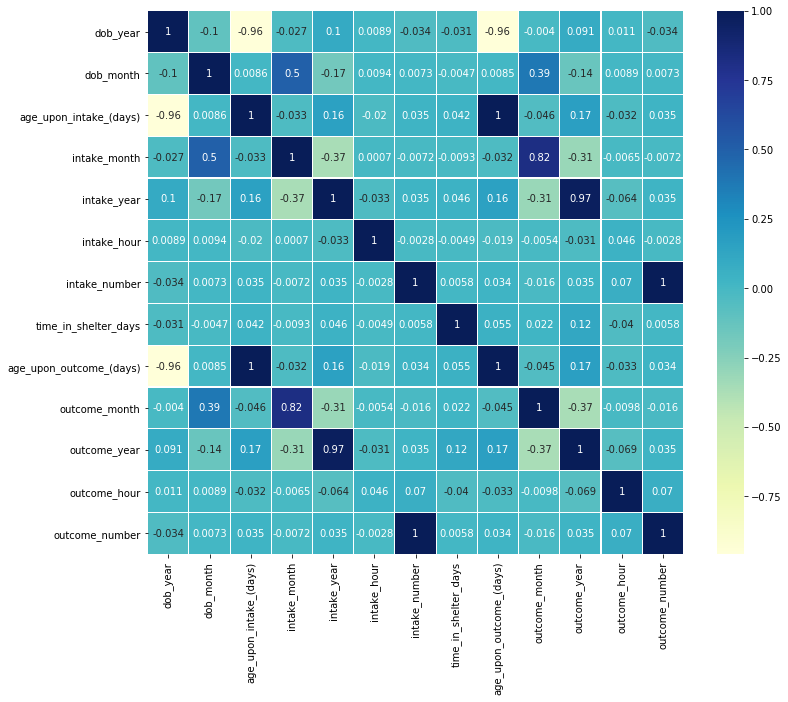

In [18]:
corrmat = data[numericalColumns].corr() 
  
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [0]:
data.drop(['dob_year', 'age_upon_intake_(days)', 'intake_month', 'intake_year', 'intake_number'], axis=1, inplace=True)

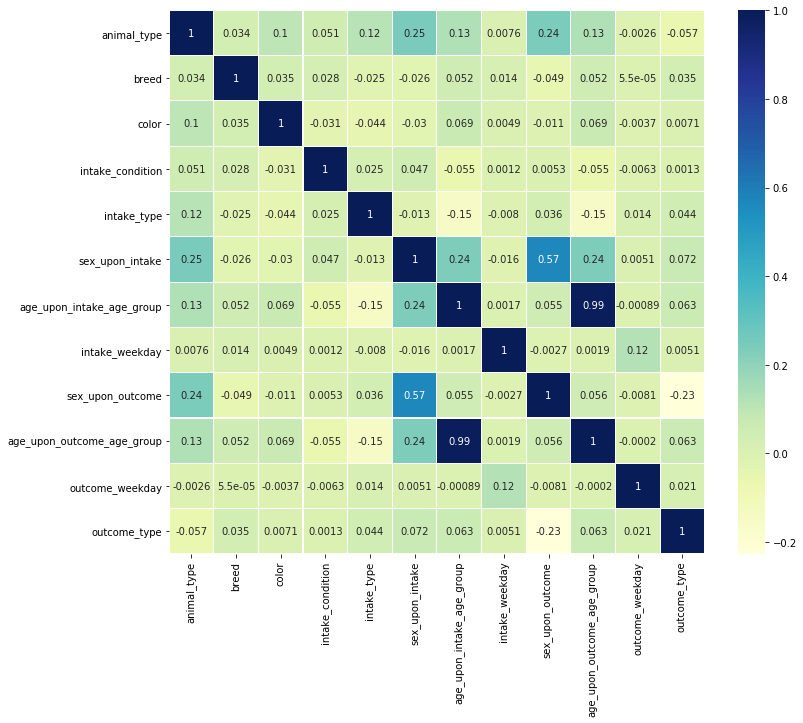

In [20]:
corrmat = data[categoryColumns].corr() 
  
f, ax = plt.subplots(figsize =(12, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [0]:
data.drop(['age_upon_intake_age_group'], axis=1, inplace=True)

In [22]:
data.head()

,dob_month,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,intake_hour,time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,7,2,1707,441,3,3,2,4,14,0.588194,2,3650,8,12,2017,4,0,1.0,6
1,7,2,1707,441,3,2,2,0,10,1.259722,2,2555,7,12,2014,2,16,2.0,6
2,7,2,1707,441,3,2,2,0,14,1.113889,2,2190,7,3,2014,2,17,3.0,6
3,4,2,718,375,3,1,2,6,15,4.970139,2,3650,8,4,2014,1,15,1.0,4
4,10,2,1618,154,2,2,2,2,9,0.119444,2,5840,3,11,2013,2,11,1.0,6


In [23]:
data.corr().loc['outcome_type',:]

dob_month                     0.001096
animal_type                  -0.056909
breed                         0.035457
color                         0.007067
intake_condition              0.001349
intake_type                   0.044011
sex_upon_intake               0.072456
intake_weekday                0.005095
intake_hour                  -0.010710
time_in_shelter_days         -0.175702
sex_upon_outcome             -0.226853
age_upon_outcome_(days)       0.066027
age_upon_outcome_age_group    0.062680
outcome_month                 0.003434
outcome_year                 -0.014785
outcome_weekday               0.020882
outcome_hour                 -0.162330
outcome_number               -0.017799
outcome_type                  1.000000
Name: outcome_type, dtype: float64

In [0]:
irrelevant = ['dob_month', 'color', 'intake_weekday', 'outcome_month']
data.drop(irrelevant, axis=1, inplace=True)

In [25]:
data.shape

(47803, 15)

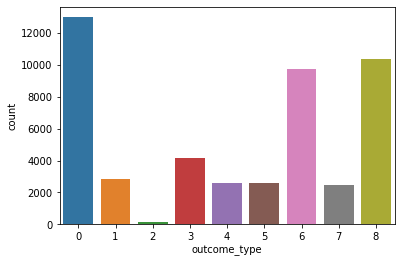

In [26]:
sns.countplot(data.outcome_type)

In [0]:
X, y = data.drop('outcome_type',axis=1), data['outcome_type']

# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X, y)
# sns.countplot(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train Shape', X_train.shape, y_train.shape)
print('Test Shape', X_test.shape, y_test.shape)

Train Shape (38242, 14) (38242,)
Test Shape (9561, 14) (9561,)


In [0]:
# feature_list = ['animal_type', 'breed', 'intake_condition', 'intake_type', 'outcome_number']
# MEE_encoder = ce.MEstimateEncoder()
# X_train[feature_list] = MEE_encoder.fit_transform(X_train[feature_list], y_train)
# X_test[feature_list] = MEE_encoder.transform(X_test[feature_list])

In [0]:
target_names = target_names = [''] * 9
for val, indx in zip(targets, data.outcome_type.unique()):
    target_names[indx] = val

In [0]:
def metrices(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print('-----------------------------------------')
    print('Train - F1-Score (Micro)', f1_score(y_train, y_pred_train, average='micro'))
    print('Test - F1-Score (Micro)', f1_score(y_test, y_pred, average='micro'))

In [0]:
logReg = LogisticRegression()
logReg = logReg.fit(X_train, y_train)

In [33]:
metrices(logReg)

                 precision    recall  f1-score   support

       Adoption       0.46      0.62      0.53      2537
           Died       0.00      0.00      0.00       577
       Disposal       0.00      0.00      0.00        31
     Euthanasia       0.00      0.00      0.00       843
        Missing       0.00      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.50      0.55      0.52      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.32      0.59      0.42      2129

       accuracy                           0.41      9561
      macro avg       0.14      0.20      0.16      9561
   weighted avg       0.29      0.41      0.34      9561

-----------------------------------------
Train - F1-Score (Micro) 0.41119711312169865
Test - F1-Score (Micro) 0.41041732036397865


In [0]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [35]:
metrices(nb)

                 precision    recall  f1-score   support

       Adoption       0.53      0.45      0.48      2537
           Died       0.00      0.00      0.00       577
       Disposal       0.08      0.74      0.15        31
     Euthanasia       0.33      0.39      0.36       843
        Missing       0.12      0.00      0.01       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.57      0.59      0.58      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.36      0.69      0.47      2129

       accuracy                           0.43      9561
      macro avg       0.22      0.32      0.23      9561
   weighted avg       0.37      0.43      0.38      9561

-----------------------------------------
Train - F1-Score (Micro) 0.4271220124470477
Test - F1-Score (Micro) 0.42955757765924074


In [0]:
DecisionTree = DecisionTreeClassifier(max_depth = 8)
DecisionTree = DecisionTree.fit(X_train, y_train)

In [37]:
metrices(DecisionTree)

                 precision    recall  f1-score   support

       Adoption       0.49      0.95      0.65      2537
           Died       0.25      0.01      0.01       577
       Disposal       0.57      0.26      0.36        31
     Euthanasia       0.76      0.63      0.69       843
        Missing       0.50      0.00      0.00       516
       Relocate       0.14      0.00      0.00       509
Return to Owner       0.87      0.80      0.83      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.60      0.60      0.60      2129

       accuracy                           0.61      9561
      macro avg       0.47      0.36      0.35      9561
   weighted avg       0.56      0.61      0.54      9561

-----------------------------------------
Train - F1-Score (Micro) 0.6122849223366978
Test - F1-Score (Micro) 0.6051668235540215


In [0]:
knn = KNeighborsClassifier(n_neighbors=30)
knn = knn.fit(X_train,y_train)

In [39]:
metrices(knn)

                 precision    recall  f1-score   support

       Adoption       0.47      0.74      0.57      2537
           Died       0.50      0.00      0.01       577
       Disposal       0.50      0.19      0.28        31
     Euthanasia       0.64      0.44      0.52       843
        Missing       0.00      0.00      0.00       516
       Relocate       1.00      0.00      0.00       509
Return to Owner       0.52      0.73      0.60      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.52      0.54      0.53      2129

       accuracy                           0.50      9561
      macro avg       0.46      0.29      0.28      9561
   weighted avg       0.49      0.50      0.44      9561

-----------------------------------------
Train - F1-Score (Micro) 0.5209194079807541
Test - F1-Score (Micro) 0.5044451417215773


In [0]:
randomForest = RandomForestClassifier(n_estimators = 27, max_depth= 8, max_features= 7)
randomForest = randomForest.fit(X_train, y_train)

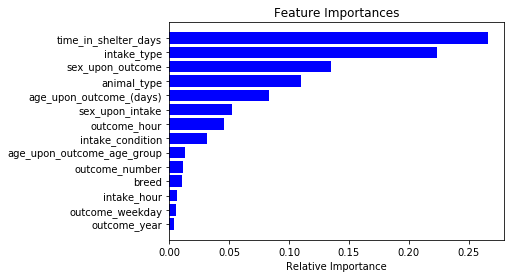

In [41]:
features = X_train.columns
importances = randomForest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
metrices(randomForest)

                 precision    recall  f1-score   support

       Adoption       0.51      0.93      0.66      2537
           Died       1.00      0.00      0.00       577
       Disposal       0.78      0.23      0.35        31
     Euthanasia       0.86      0.62      0.72       843
        Missing       0.00      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.82      0.83      0.83      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.59      0.64      0.61      2129

       accuracy                           0.61      9561
      macro avg       0.51      0.36      0.35      9561
   weighted avg       0.57      0.61      0.54      9561

-----------------------------------------
Train - F1-Score (Micro) 0.620940327388735
Test - F1-Score (Micro) 0.614266290137015


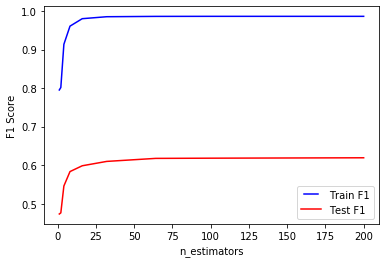

In [43]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   roc_auc = f1_score(y_train, train_pred, average='micro')
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = f1_score(y_test, y_pred, average='micro')
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train F1")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.show()

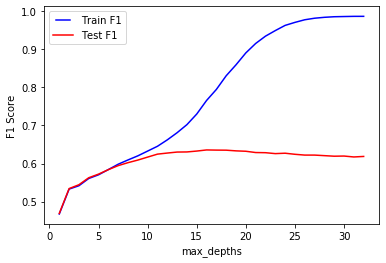

In [44]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   roc_auc = f1_score(y_train, train_pred, average='micro')
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = f1_score(y_test, y_pred, average='micro')
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train F1")
line2, = plt.plot(max_depths, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('max_depths')
plt.show()

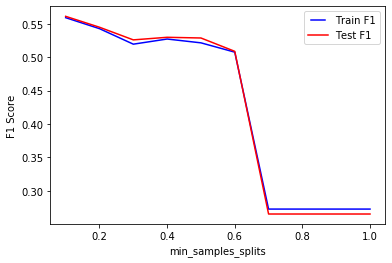

In [45]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   roc_auc = f1_score(y_train, train_pred, average='micro')
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = f1_score(y_test, y_pred, average='micro')
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train F1")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_splits')
plt.show()

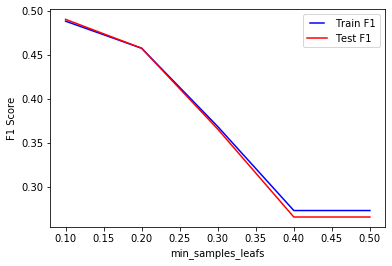

In [46]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   roc_auc = f1_score(y_train, train_pred, average='micro')
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = f1_score(y_test, y_pred, average='micro')
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train F1")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('min_samples_leafs')
plt.show()

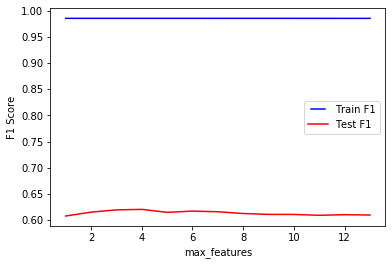

In [47]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   roc_auc = f1_score(y_train, train_pred, average='micro')
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = f1_score(y_test, y_pred, average='micro')
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train F1")
line2, = plt.plot(max_features, test_results, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 Score')
plt.xlabel('max_features')
plt.show()

In [0]:
gradientBoosting = GradientBoostingClassifier()
gradientBoosting = gradientBoosting.fit(X_train, y_train)

In [49]:
metrices(gradientBoosting)

                 precision    recall  f1-score   support

       Adoption       0.54      0.90      0.67      2537
           Died       0.32      0.01      0.03       577
       Disposal       0.76      0.42      0.54        31
     Euthanasia       0.81      0.66      0.73       843
        Missing       0.33      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.85      0.83      0.84      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.56      0.71      0.63      2129

       accuracy                           0.63      9561
      macro avg       0.47      0.39      0.38      9561
   weighted avg       0.55      0.63      0.56      9561

-----------------------------------------
Train - F1-Score (Micro) 0.6351916740756237
Test - F1-Score (Micro) 0.6267126869574312


In [0]:
xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)

In [51]:
metrices(xgb)

                 precision    recall  f1-score   support

       Adoption       0.52      0.93      0.67      2537
           Died       0.29      0.00      0.01       577
       Disposal       0.82      0.29      0.43        31
     Euthanasia       0.82      0.64      0.72       843
        Missing       0.00      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.86      0.82      0.84      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.58      0.67      0.62      2129

       accuracy                           0.62      9561
      macro avg       0.43      0.37      0.36      9561
   weighted avg       0.53      0.62      0.55      9561

-----------------------------------------
Train - F1-Score (Micro) 0.622692327807123
Test - F1-Score (Micro) 0.6222152494508942


In [52]:
def sort_metrics(model):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='micro')

models = pd.DataFrame({
    'models': [
    'Logistic Regression', 
    'Naive Bayes',
    'Decision Tree',
    'KNN',
    'Random Forest',
    'Gradient Boosting Trees',
    'XGBClassifier'
],
    
'F1-Score (Micro)': [
    sort_metrics(logReg),
    sort_metrics(nb),
    sort_metrics(DecisionTree),
    sort_metrics(knn),
    sort_metrics(randomForest),
    sort_metrics(gradientBoosting),
    sort_metrics(xgb)
    
],

})
models.sort_values(by='F1-Score (Micro)', ascending=False)

,models,F1-Score (Micro)
5,Gradient Boosting Trees,0.626713
6,XGBClassifier,0.622215
4,Random Forest,0.614266
2,Decision Tree,0.605167
3,KNN,0.504445
1,Naive Bayes,0.429558
0,Logistic Regression,0.410417


In [0]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [54]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

%time GBM_model.fit(X=X_train, y=y_train)

y_pred = GBM_model.predict(X_test)


print(classification_report(y_test,y_pred,digits=4))

from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

%time CV_GBM.fit(X=X_train, y=y_train)

# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

CPU times: user 25.4 s, sys: 914 ms, total: 26.3 s
Wall time: 26.4 s
              precision    recall  f1-score   support

           0     0.5401    0.8833    0.6704      2537
           1     0.2381    0.0173    0.0323       577
           2     0.5000    0.2581    0.3404        31
           3     0.8152    0.6489    0.7226       843
           4     0.1034    0.0058    0.0110       516
           5     0.0571    0.0039    0.0074       509
           6     0.8539    0.8412    0.8475      1952
           7     0.0455    0.0021    0.0041       467
           8     0.5688    0.7144    0.6334      2129

    accuracy                         0.6249      9561
   macro avg     0.4136    0.3750    0.3632      9561
weighted avg     0.5430    0.6249    0.5599      9561

CPU times: user 1h 20min 20s, sys: 30.2 s, total: 1h 20min 50s
Wall time: 1h 20min 55s
0.6266147371521751 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [55]:
metrices(best_gbm_model)

                 precision    recall  f1-score   support

       Adoption       0.55      0.89      0.68      2537
           Died       0.33      0.02      0.04       577
       Disposal       0.65      0.42      0.51        31
     Euthanasia       0.80      0.69      0.74       843
        Missing       0.11      0.00      0.01       516
       Relocate       0.12      0.00      0.01       509
Return to Owner       0.86      0.84      0.85      1952
      Rto-Adopt       0.04      0.00      0.00       467
       Transfer       0.58      0.73      0.64      2129

       accuracy                           0.64      9561
      macro avg       0.45      0.40      0.39      9561
   weighted avg       0.56      0.64      0.57      9561

-----------------------------------------
Train - F1-Score (Micro) 0.6731865488206684
Test - F1-Score (Micro) 0.6352891956908273


In [56]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100],
     'max_depth': [10, 15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

%time CV_XGB.fit(X = X_train, y=y_train)

# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

CPU times: user 1min 14s, sys: 173 ms, total: 1min 14s
Wall time: 1min 14s
CPU times: user 39min 14s, sys: 4.33 s, total: 39min 18s
Wall time: 39min 21s
0.6352962780649218 {'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 100}


In [57]:
metrices(best_xgb_model)

                 precision    recall  f1-score   support

       Adoption       0.55      0.90      0.68      2537
           Died       0.37      0.02      0.04       577
       Disposal       0.80      0.39      0.52        31
     Euthanasia       0.81      0.69      0.75       843
        Missing       0.00      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.85      0.86      0.85      1952
      Rto-Adopt       0.12      0.00      0.00       467
       Transfer       0.60      0.74      0.66      2129

       accuracy                           0.64      9561
      macro avg       0.46      0.40      0.39      9561
   weighted avg       0.55      0.64      0.57      9561

-----------------------------------------
Train - F1-Score (Micro) 0.7400763558391298
Test - F1-Score (Micro) 0.6431335634347871


In [0]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}
scores = ['f1_micro']

In [59]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 36}

Grid scores on development set:

0.497 (+/-0.062) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9}
0.519 (+/-0.029) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18}
0.525 (+/-0.008) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27}
0.527 (+/-0.025) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36}
0.530 (+/-0.006) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45}
0.532 (+/-0.003) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54}
0.531 (+/-0.004) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63}
0.522 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9}
0.515 (+/-0.019) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18}
0.521 (+/-0.019) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27}
0.524 (+/-0

In [60]:
param_grid

{'max_depth': [2, 3, 5, 7],
 'min_samples_leaf': [2, 4],
 'n_estimators': [9, 18, 27, 36, 45, 54, 63]}

In [61]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,verbose=1)
CV_rfc.fit(X=X_train, y=y_train)
print (CV_rfc.best_score_, CV_rfc.best_params_) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.3min finished


0.5928822839532173 {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 18}


In [62]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.08605008, 0.14822283, 0.22118645, 0.2725512 , 0.33104796,
        0.40374293, 0.44595118, 0.08090286, 0.15029387, 0.21092348,
        0.27967582, 0.36357455, 0.43065209, 0.49468246, 0.10435905,
        0.1832521 , 0.26668181, 0.34538522, 0.39839201, 0.49844823,
        0.55647926, 0.10077434, 0.18736105, 0.26266146, 0.34062405,
        0.39934373, 0.48870902, 0.55194006, 0.12474937, 0.23570027,
        0.3311542 , 0.42551022, 0.532445  , 0.62774153, 0.72374148,
        0.11832142, 0.23647146, 0.32744918, 0.4181253 , 0.51327829,
        0.60138559, 0.68965721, 0.13872304, 0.26783266, 0.41750956,
        0.54634032, 0.65956182, 0.76303511, 0.90132389, 0.15148578,
        0.29592705, 0.41411672, 0.53379498, 0.64686604, 0.78800983,
        0.9242424 ]),
 'mean_score_time': array([0.10417533, 0.10408502, 0.10443006, 0.10430088, 0.10444646,
        0.10408049, 0.10407381, 0.10372167, 0.10386734, 0.1041966 ,
        0.10436888, 0.10470858, 0.10467882, 0.10489054, 0.

In [63]:
metrices(CV_rfc)

                 precision    recall  f1-score   support

       Adoption       0.50      0.92      0.65      2537
           Died       0.00      0.00      0.00       577
       Disposal       1.00      0.06      0.12        31
     Euthanasia       0.87      0.55      0.67       843
        Missing       0.00      0.00      0.00       516
       Relocate       0.00      0.00      0.00       509
Return to Owner       0.76      0.84      0.80      1952
      Rto-Adopt       0.00      0.00      0.00       467
       Transfer       0.59      0.61      0.60      2129

       accuracy                           0.60      9561
      macro avg       0.41      0.33      0.32      9561
   weighted avg       0.50      0.60      0.53      9561

-----------------------------------------
Train - F1-Score (Micro) 0.6027404424454788
Test - F1-Score (Micro) 0.6005647944775651
